# Week 4: The density matrix and optical Bloch equations


This notebook is to accompany the _Week 4_ content for the atomic physics component of KYA323: Atomic and nuclear physics at the University of Tasmania.

**Version**: 1.0  
**Created**: 02/07/2024 (AJM)  
**Updated**: 06/08/2024 (AJM)

## Import packages

To streamline operations in Python, packages can be imported to perform a host of various tasks. To make this process as simple as possible, most of the required packages for the course are included in the file [`Atomic.py`](https://github.com/Andy-UTAS/Solid-state/blob/master/SSP.py). For this section, we also make use of the [`OBE_Python_Tools`](https://github.com/LucyDownes/OBE_Python_Tools) package to aid with solving the optical Bloch equations.

As usual, we begin by importing all of the content required for our calculations:

In [1]:
from Atomic import *
import OBE_Tools as OBE

Atomic.py - the package for atomic physics content for use in KYA323 has been loaded. 

Core package versions are as follows:
Matplotlib 3.7.1
NumPy 1.25.0


Time evolution demands that we make animations, so we are going to import some goodies to make animations work in `jupyter`, which can sometimes be a bit fiddly to get working. 

In [2]:
# Animation specific imports
from IPython.display import HTML # IPython for rendering in-line animations
plt.rcParams["animation.html"] = "jshtml"

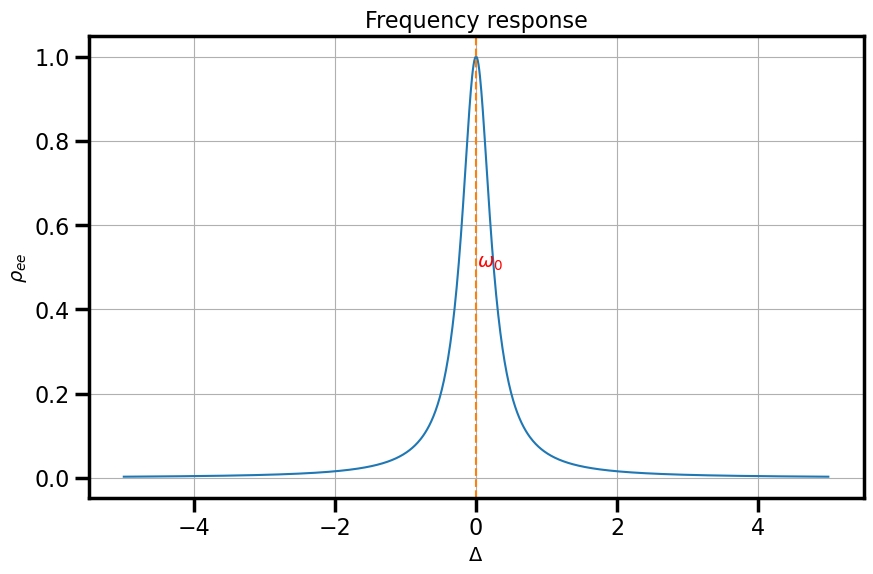

In [14]:
# Define the Lorentzian function
def lorentzian(Delta, Delta_0, gamma):
    return (gamma / 2)**2 / ((Delta - Delta_0)**2 + (gamma / 2)**2)

# Parameters
Delta_0 = 0  # Position of the peak (center of the plot)
gamma = 0.5  # Width of the Lorentzian (narrow peak)
Delta_range = np.linspace(-5, 5, 1000)  # Range of detuning values

# Calculate the Lorentzian line shape
rho_ee = lorentzian(Delta_range, Delta_0, gamma)

# Plotting the Lorentzian line shape
plt.figure(figsize=(10, 6))
plt.plot(Delta_range, rho_ee, label=r'$\rho_{ee}$')
plt.axvline(x=Delta_0, color='C1', linestyle='--')  # Vertical line at the peak position
plt.text(Delta_0 + 0.02, 0.5, r'$\omega_0$', color='r', fontsize=14)  # Label for the peak

# Axis labels
plt.xlabel(r'$\Delta$', fontsize=14)
plt.ylabel(r'$\rho_{ee}$', fontsize=14)
plt.y_range(0,
# Title and grid
plt.title('Frequency response', fontsize=16)
plt.grid(True)

# Show plot
plt.show()


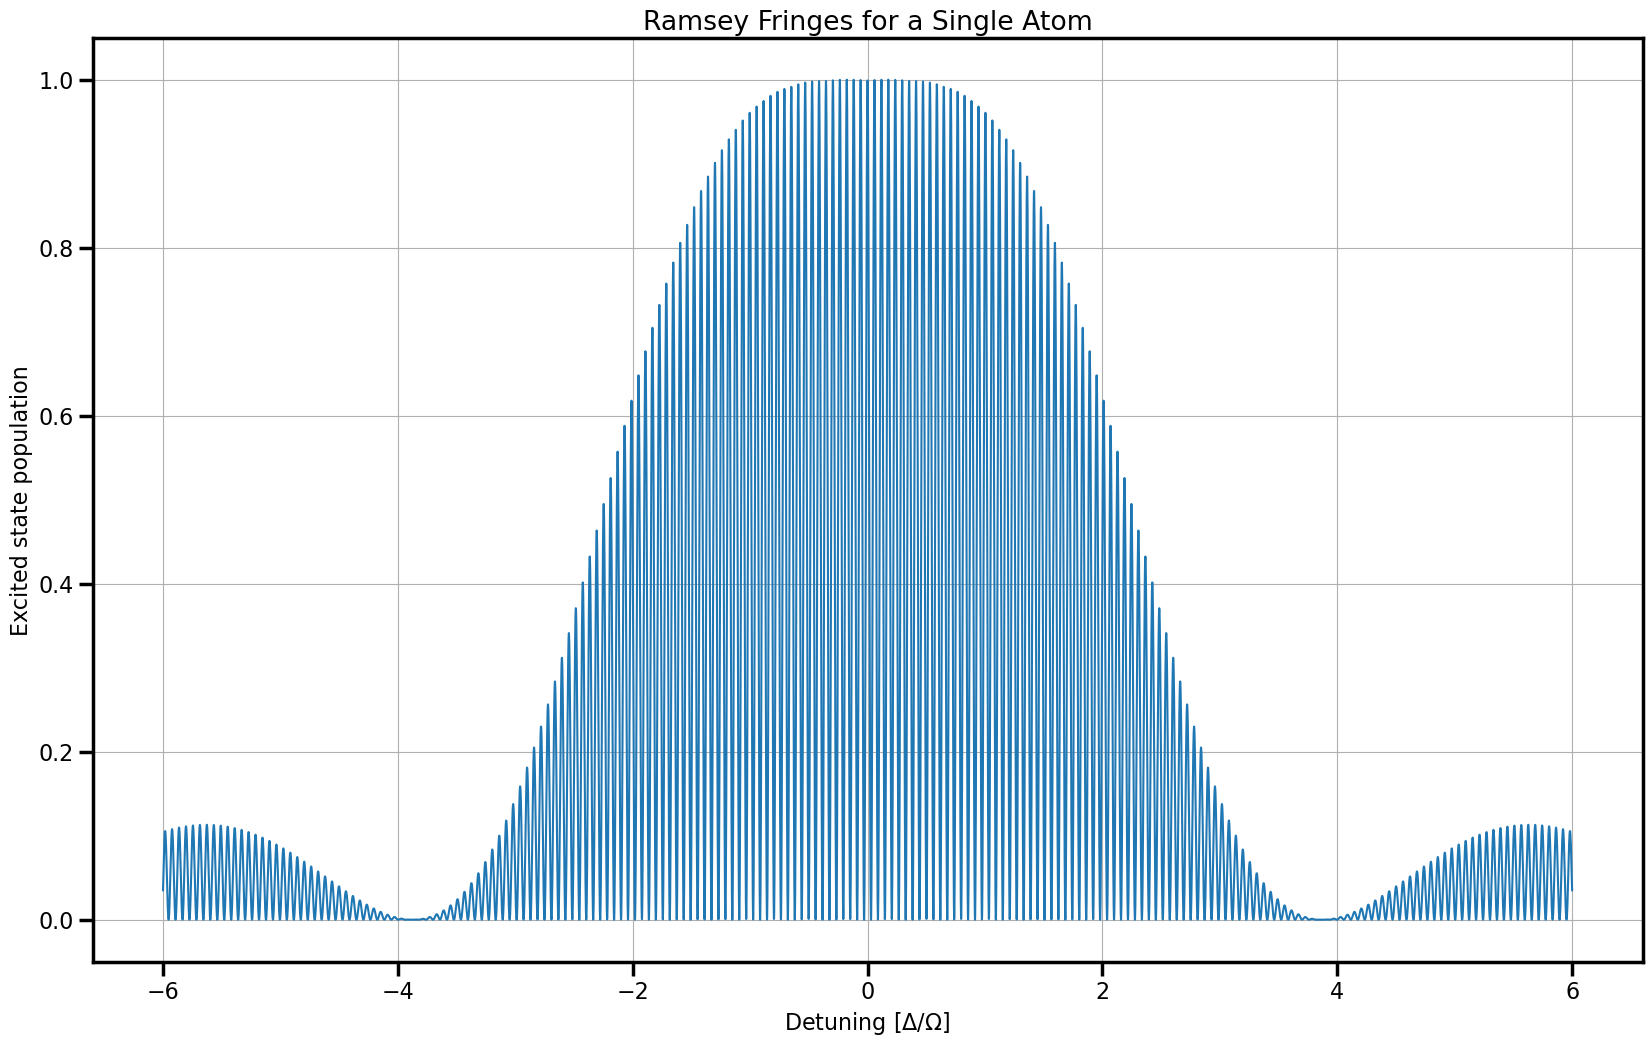

In [6]:
# Define the probability for excitation
def P(Delta, T, tau):
    term1 = (4 / (1 + Delta**2)) * (np.sin(np.sqrt(1 + Delta**2) * tau / 2))**2
    cos_term = np.cos((Delta * T) / 2) * np.cos(np.sqrt(1 + Delta**2) * tau / 2)
    sin_term = (Delta / np.sqrt(1 + Delta**2)) * np.sin((Delta * T) / 2) * np.sin(np.sqrt(1 + Delta**2) * tau / 2)
    term2 = (cos_term - sin_term)**2
    return term1 * term2

# Parameters
L = 1.53
l = 0.023
T_new = np.pi / 2 * (L / l)
tau_new = np.pi / 2

# Define the detuning range
Delta_range = np.linspace(-6, 6, 10000)

# Calculate the excitation probability
P_values = P(Delta_range, T_new, tau_new)

# Plotting
plt.figure(figsize=(20, 12))
plt.plot(Delta_range, P_values)
plt.xlabel(r'Detuning [$\Delta/\Omega$]')
plt.ylabel('Excited state population')
plt.title('Ramsey Fringes for a Single Atom')
plt.grid(True)
plt.show()

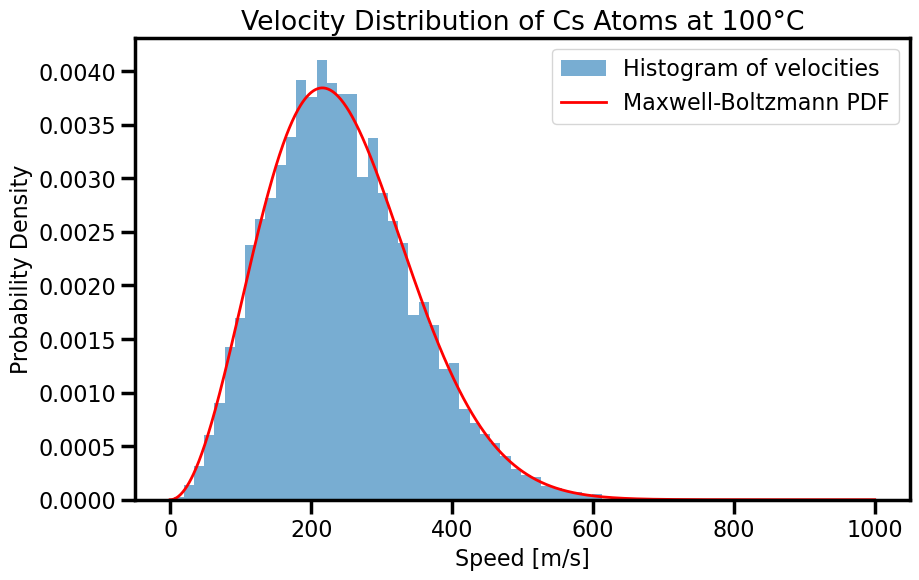

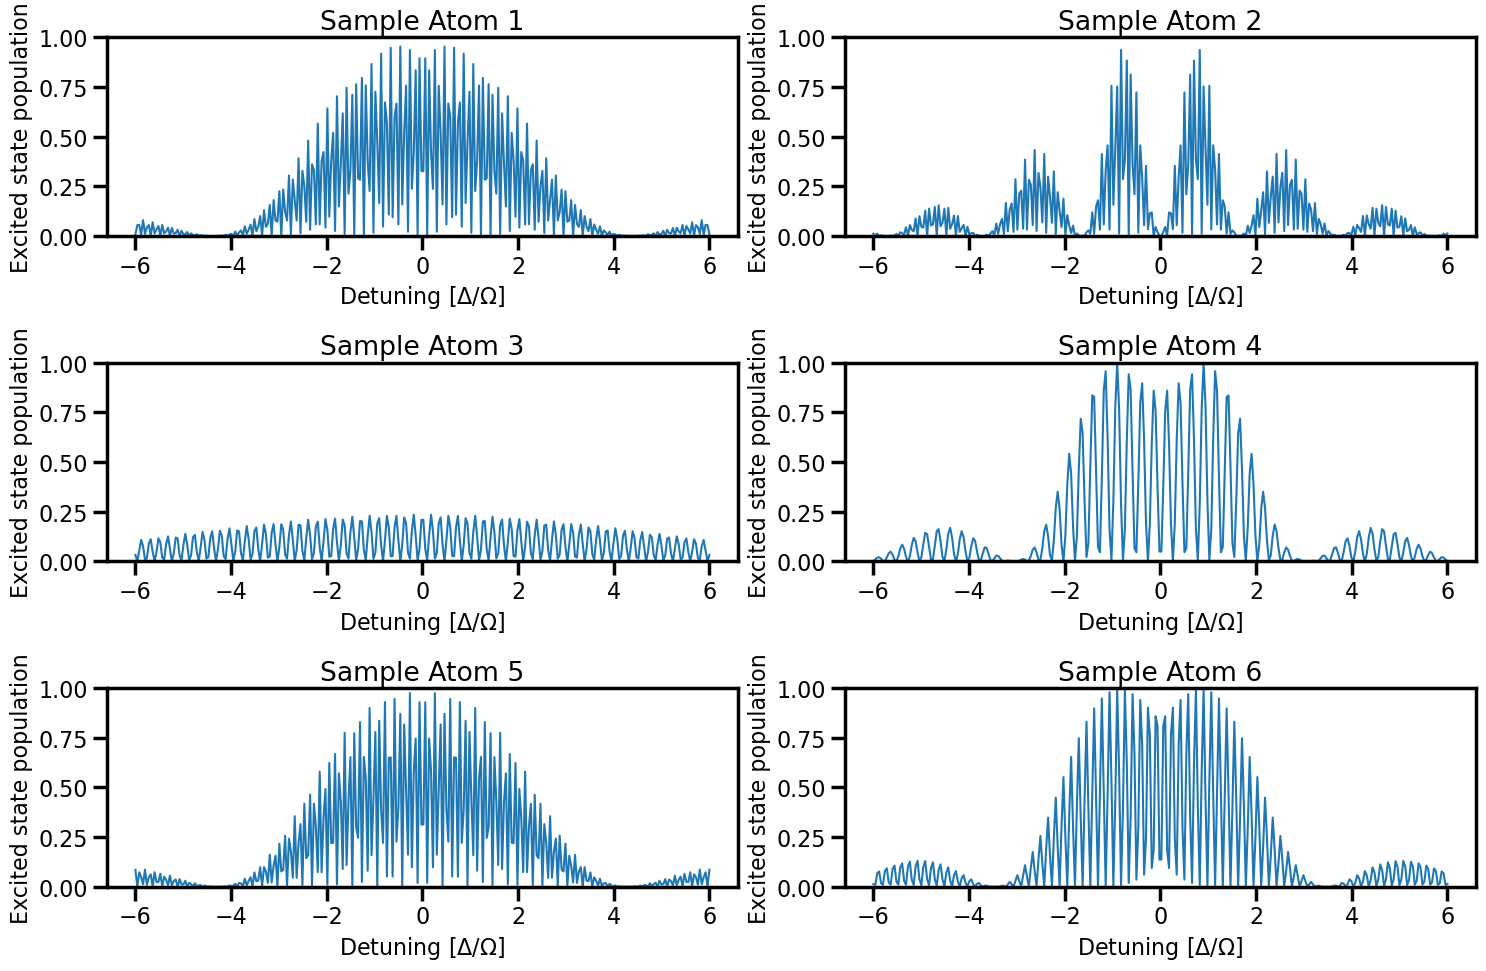

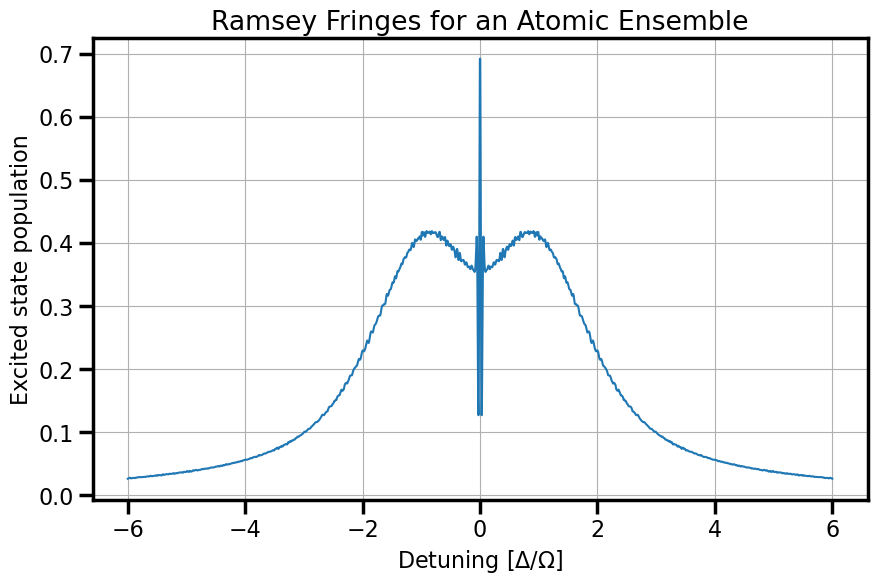

In [9]:
from scipy.stats import maxwell

# Constants and Parameters
mCs = 132.90545 * 1.66053906660e-27  # Caesium mass in kg (from atomic mass units)
beamtemp = 373  # Temperature in Kelvin
L = 1.53  # Length in meters
l = 0.023  # Interaction zone length in meters

# Mean velocity calculation from Maxwell-Boltzmann distribution
def vmean(T):
    return np.sqrt((8 * kb * T) / (np.pi * mCs))

# Generate velocities using Maxwell-Boltzmann distribution
n_atoms = 10000
MDvelocities = maxwell.rvs(scale=np.sqrt(kb * beamtemp / mCs), size=n_atoms)

# Plot the velocity distribution
plt.figure(figsize=(10, 6))
plt.hist(MDvelocities, bins=50, density=True, alpha=0.6, label="Histogram of velocities")
v_values = np.linspace(0, 1000, 1000)
plt.plot(v_values, maxwell.pdf(v_values, scale=np.sqrt(kb * beamtemp / mCs)), 'r-', lw=2, label="Maxwell-Boltzmann PDF")
plt.xlabel('Speed [m/s]')
plt.ylabel('Probability Density')
plt.title('Velocity Distribution of Cs Atoms at 100°C')
plt.legend()
plt.show()

# Define the probability for excitation function for a given velocity
def P(Delta, T_new, tau_new):
    term1 = (4 / (1 + Delta**2)) * (np.sin(np.sqrt(1 + Delta**2) * tau_new / 2))**2
    cos_term = np.cos((Delta * T_new) / 2) * np.cos(np.sqrt(1 + Delta**2) * tau_new / 2)
    sin_term = (Delta / np.sqrt(1 + Delta**2)) * np.sin((Delta * T_new) / 2) * np.sin(np.sqrt(1 + Delta**2) * tau_new / 2)
    term2 = (cos_term - sin_term)**2
    return term1 * term2

# Sample velocities and calculate probabilities
samplev = MDvelocities[:6]
sampleprobs = [P(np.linspace(-6, 6, 300), np.pi / 2 * v / vmean(beamtemp) * L / l, np.pi / 2 * v / vmean(beamtemp)) for v in samplev]

# Plotting the Ramsey fringes for the sample velocities
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()
for i, prob in enumerate(sampleprobs):
    axes[i].plot(np.linspace(-6, 6, 300), prob)
    axes[i].set_ylim(0, 1)
    axes[i].set_xlabel(r'Detuning [$\Delta/\Omega$]')
    axes[i].set_ylabel('Excited state population')
    axes[i].set_title(f'Sample Atom {i+1}')

plt.tight_layout()
plt.show()

# Calculate the ensemble signal by summing over all atoms
probs = np.array([P(np.linspace(-6, 6, 2000), np.pi / 2 * v / vmean(beamtemp) * L / l, np.pi / 2 * v / vmean(beamtemp)) for v in MDvelocities])
signal = np.mean(probs, axis=0)

# Plotting the ensemble signal
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(-6, 6, 2000), signal)
plt.xlabel(r'Detuning [$\Delta/\Omega$]')
plt.ylabel('Excited state population')
plt.title('Ramsey Fringes for an Atomic Ensemble')
plt.grid(True)
plt.show()
